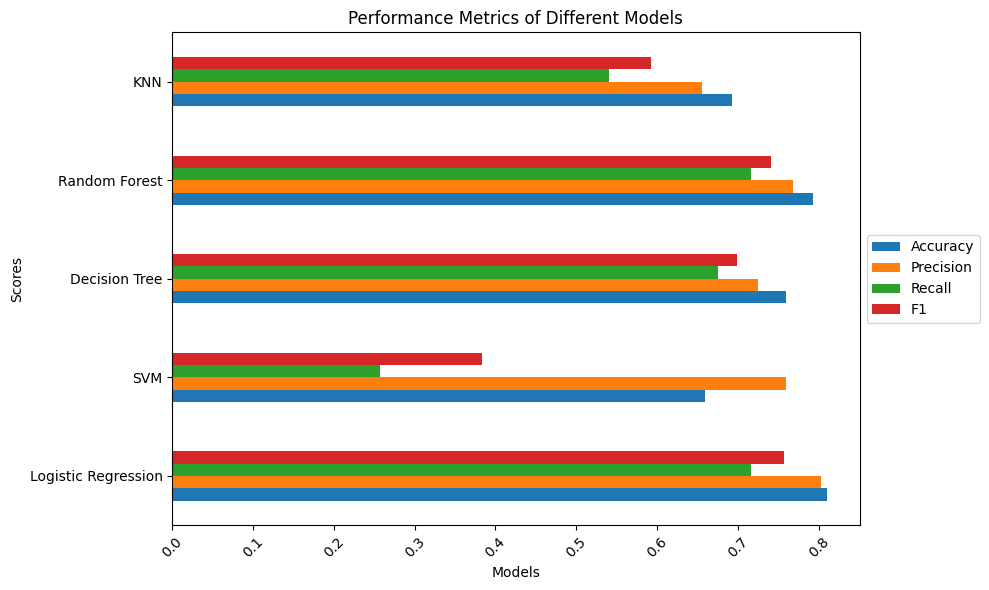

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

df = sns.load_dataset("titanic")
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']
X = pd.get_dummies(X, columns=['sex']) # one hot encoding
X.age.fillna(value = X['age'].mean(), inplace=True)   # fill missing values with mean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split data

models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN']

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
metric_scores = []

# Loop through each model and calculate the performance metrics
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metric_scores.append([model_name, accuracy, precision, recall, f1])

# Convert the results to a DataFrame for easier plotting
metrics_df = pd.DataFrame(metric_scores, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
metrics_df.set_index('Model').plot(kind='barh', ax=ax)
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics of Different Models')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()
